# Law of Large Numbers
## Author: Snigdhayan Mahanta

Suppose an experiment has a finite discrete set of numerical outcomes, e.g., the roll of a die. Suppose further that each outcome has an associated probability, so that based on this information one can compute the `expected value` of the experiment. Suppose one repeats the experiment a certain number of times (say $n$) and computes the average value of the outcomes (denoted by $X_n$). Then the `Law of Large Numbers` in its weak form states that as $n$ tends to infinity, the value $X_n$ converges to the `expected value`. The term "convergence" has a precise mathematical formulation that I will skip here.

I illustrated this phenomenon with the help of a simple experiment below.

In [1]:
# Experiment information - outcomes and the probability distribution
outcomes <- c(1:10) # the vector of outcomes
vec <- sample(c(1:1000), size=length(outcomes), replace=TRUE)
prob_distn <- vec/sum(vec) # the associated probability distribution

In [2]:
# Verify if the outcomes conform with the probability distribution
trialLength <- 10000 # the number of trials for the verification
distributionTable <- integer(trialLength)

for (i in c(1:trialLength)) {
    distributionTable[i] <- sample(outcomes, size=1, prob=prob_distn, replace=TRUE)
}


computed_prob <- round(table(distributionTable)/trialLength, 2)
computed_prob_df <- cbind("Outcome"=outcomes, 
                          "Computed Probability"=as.numeric(computed_prob),
                          "Actual Probability"=round(prob_distn, 2))
computed_prob_df # there can be a slight discrepancy due to the rounding of the values

Outcome,Computed Probability,Actual Probability
1,0.06,0.06
2,0.18,0.17
3,0.06,0.06
4,0.12,0.12
5,0.09,0.09
6,0.13,0.13
7,0.10,0.10
8,0.03,0.04
9,0.07,0.07
10,0.16,0.16


In [3]:
# Compute the expected value
expected_value <- sum(outcomes*prob_distn)
expected_value

[1] 5.550329

In [4]:
# Define a function to compute the average for a certain number of trials
compute_avg <- function(n_trials, outcomes, prob_distn) {
    trials <- integer(n_trials)
    for (i in c(1:n_trials)) {
        trials[i] <- sample(outcomes, size=1, prob = prob_distn, replace=TRUE)
    }
    avg <- sum(trials)/length(trials)
    return(avg)
}

In [5]:
# First check - number of trials = 100
error1 <- abs(expected_value - compute_avg(100, outcomes, prob_distn))
error1

[1] 0.5103285

In [6]:
# Second check - number of trials = 10000
error2 <- abs(expected_value - compute_avg(10000, outcomes, prob_distn))
error2

[1] 0.0008714849

In [7]:
# Compute the absolute value of error as a function of the number of trials
range <- seq(from=100, to=10000, by=10)
error_vector <- numeric(length(range))
index <- 1

for (n in range) {
    error_vector[index] <- abs(expected_value - compute_avg(n, outcomes, prob_distn))
    index = index+1
}

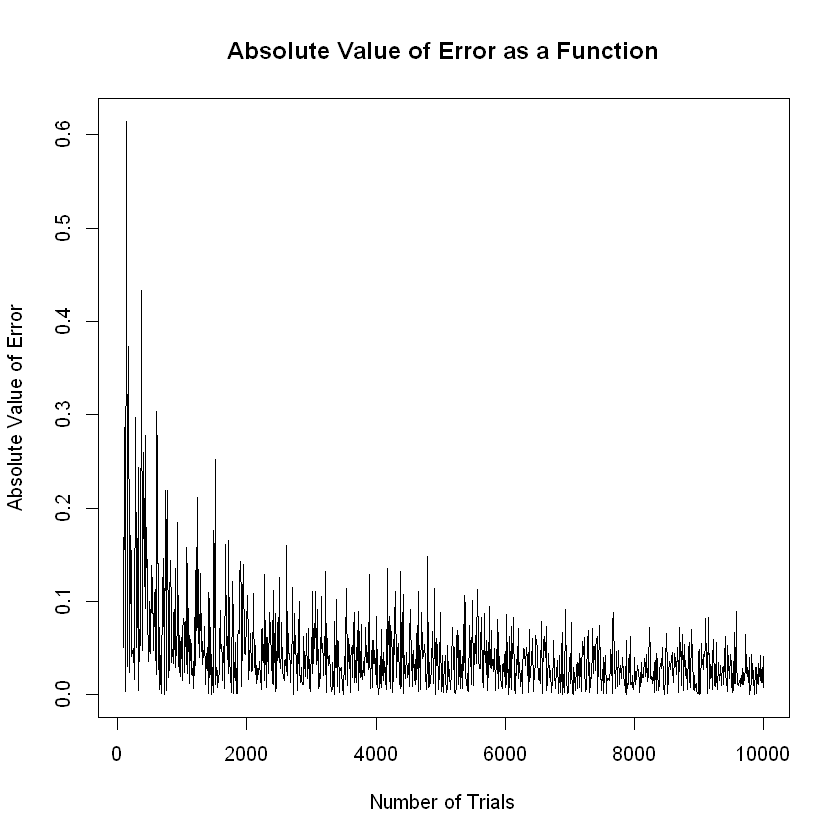

In [8]:
# Plot the error as a function of the number of trials
plot(x = range,
     y = error_vector,
     type="l",
     main="Absolute Value of Error as a Function", 
     xlab="Number of Trials", 
     ylab="Absolute Value of Error")

Observe how the absolute value of the error tends to decrease as the number of trials increases.